In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pwd

/home/luca/Desktop/uni/master/lab/distributed_systems/ds/predator-prey-service/src/notebooks


In [3]:
coordinates_path = "../main/resources/experiment_data/positions_2.csv"
rewards_path = "../main/resources/experiment_data/rewards_2.csv"

In [4]:
df_coordinates = pd.read_csv(coordinates_path)
df_coordinates.head()

,Unnamed: 0,elapsed_time,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,...,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10
0,0,81.797528,34.271283,63.298726,22.348109,89.906549,135.721875,95.224505,145.050751,218.508877,...,58.372664,189.742907,195.717345,29.548108,239.678210,130.469655,228.551939,0.699887,212.895473,85.422492
1,1,120.288451,33.088651,61.682630,23.526864,88.457512,135.205082,96.380144,144.254818,219.099373,...,60.289022,188.103827,197.009115,28.214318,241.104998,129.198677,227.693919,2.034700,214.085334,87.128552
2,2,157.640819,31.926918,60.781748,22.227737,89.582894,136.532754,95.892380,144.920523,218.214364,...,58.496726,190.475171,195.289552,29.763131,240.036611,130.692986,226.894205,1.468452,216.033676,88.479565
3,3,249.587178,31.129354,59.788297,23.219840,88.180924,135.776947,97.839494,144.697307,218.399691,...,60.613338,188.473189,197.043311,27.929745,241.666952,129.732533,226.333612,0.649498,217.405914,90.667671
4,4,373.173755,30.396251,59.761746,22.694269,89.919528,136.600238,96.441047,144.682717,219.123606,...,60.297223,190.477465,196.778705,29.829053,241.728613,131.623212,225.540325,0.620518,219.399306,91.981782


In [5]:
len(df_coordinates)


319

In [6]:
df_rewards = pd.read_csv(rewards_path)
df_rewards.head()

,Unnamed: 0,elapsed_time,r_0,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10
0,0,81.797528,0.000000,0.0,0.726042,0.395378,0.0,0.129495,0.304736,0.812908,0.831397,0.695254,0.168603
1,1,120.288451,0.302613,0.0,0.719081,0.000000,0.0,0.000000,0.308231,0.800510,0.845718,0.693740,0.154282
2,2,157.640819,0.289929,0.0,0.716550,0.423985,0.0,0.000000,0.290235,0.789079,0.853634,0.685921,0.146366
3,3,249.587178,0.281080,0.0,0.707871,0.433620,0.0,0.000000,0.293816,0.784916,0.860176,0.679927,0.139824
4,4,373.173755,0.269960,0.0,0.000000,0.436459,0.0,0.000000,0.282706,0.774201,0.871128,0.674555,0.128872


In [7]:
len(df_rewards)

319

In [8]:
x_coord = [col for col in df_coordinates.columns if col.startswith("x")]
y_coord = [col for col in df_coordinates.columns if col.startswith("y")]

In [9]:
reward_cols = [col for col in df_rewards.columns if col.startswith("r")]

In [10]:
import numpy as np

blue_cmap = plt.cm.Blues
red_cmap = plt.cm.Reds

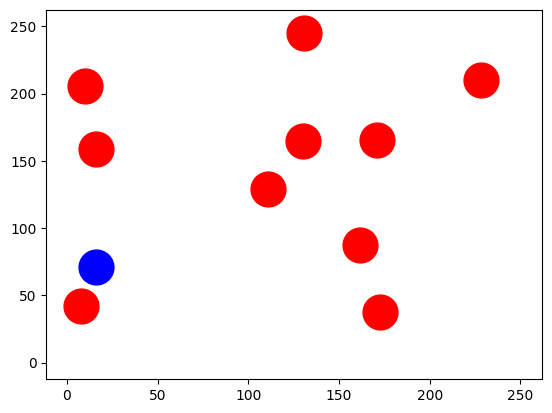

In [11]:
n = int(len(df_coordinates) * 0.90)

num_predators = 10
num_preys = 1

from celluloid import Camera

camera = Camera(plt.figure())
for i in range(len(df_coordinates)):
    x = df_coordinates[x_coord].loc[i]
    y = df_coordinates[y_coord].loc[i]
    #r = df_rewards[reward_cols].loc[i]
    
    x_pred, y_pred, r_pred = x[:num_predators], y[:num_predators], 0#, r[:num_predators]
    x_prey, y_prey, r_prey = x[num_predators:], y[num_predators:], 0#, r[num_predators:]
    
    plt.scatter(x_pred, y_pred, c="r", s=200 * np.pi, marker='o')
    #for i in range(len(x_pred)):
    #    plt.text(x_pred[i] + 0.1, y_pred[i], round(r_pred[i], 2), fontsize=12)  # Offset x[i] for better readability
    # [blue_cmap(r) for r in r_prey]
    plt.scatter(x_prey, y_prey, c="b", s=200 * np.pi, marker='o')     
    #for i in range(len(x_prey)):
    #    plt.text(x_prey[i] + 0.1, y_prey[i], round(r_prey[i], 2), fontsize=12)  # Offset x[i] for better readability

    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.mp4')

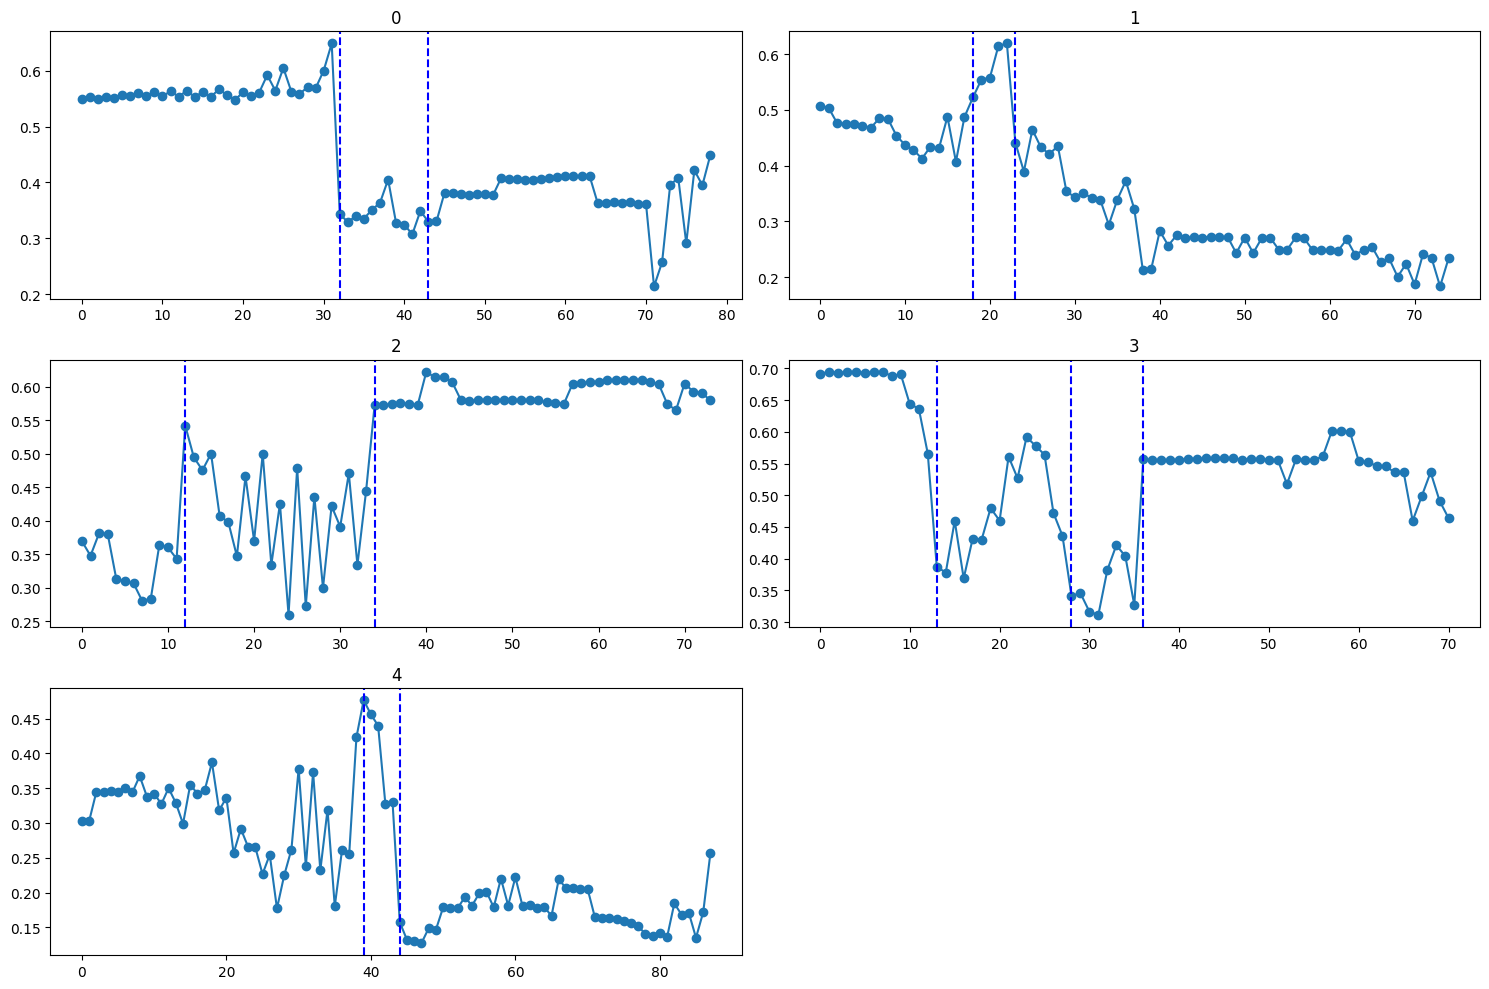

In [14]:
import numpy as np
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for sim_id in range(5):
    rewards_path = f"../main/resources/experiment_data/rewards_{sim_id}.csv"
    df_rewards = pd.read_csv(rewards_path)
    
    et_ref = 0
    k = [(0, True)]
    for i, et in enumerate(df_rewards["elapsed_time"]):
        if et < et_ref:
            last_k = k[len(k) - 1]
            k.append((i, np.abs(i - last_k[0]) + 1 == 50))
        et_ref = et
        
    axs[sim_id].set_title(f"{sim_id}")
    axs[sim_id].plot([np.mean(df_rewards[reward_cols].loc[i]) for i in range(len(df_rewards))], marker='o')
    for kk, f in k[1:]:
        axs[sim_id].axvline(x=kk, color='r' if f else 'b', linestyle='--')
        
# Hide the last empty subplot (if any)
axs[-1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()